# Ensemble learning techniques

In [1]:
import sklearn

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
bank_data = pd.read_csv('data/bank_data.csv')
bank_data = bank_data.drop(['ID', 'Experience', 'ZIP Code', 'CCAvg', 'Personal Loan'], axis=1)
bank_data.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,34,180,1,3,0,0,0,0,0
1,38,130,4,3,134,0,0,0,0
2,46,193,2,3,0,0,0,0,0
3,38,119,1,2,0,0,1,1,1
4,42,141,3,3,0,1,1,1,0


In [4]:
bank_data.apply(lambda x: len(x.unique()))

Age                    40
Income                102
Family                  4
Education               3
Mortgage              141
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Text(0, 0.5, 'CreditCard')

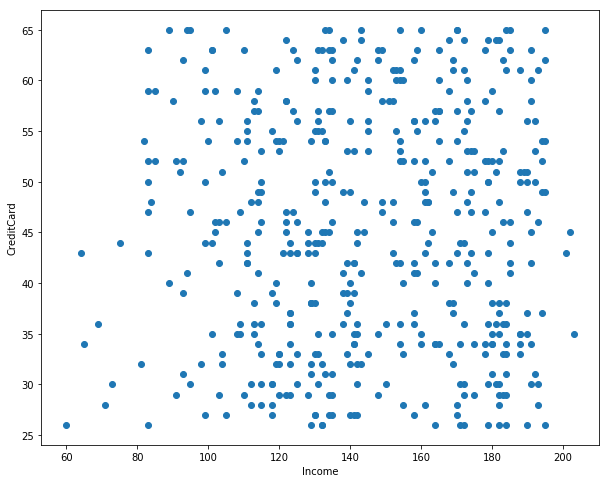

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter( bank_data['Income'], bank_data['Age'])
plt.xlabel('Income')
plt.ylabel('CreditCard')

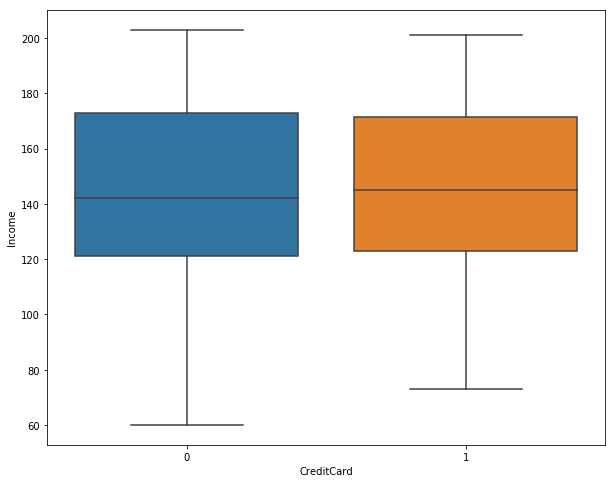

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(bank_data['CreditCard'], bank_data['Income'])

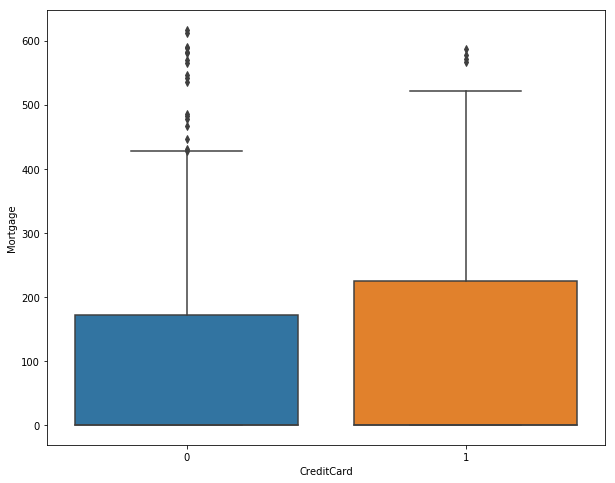

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(bank_data['CreditCard'], bank_data['Mortgage'])

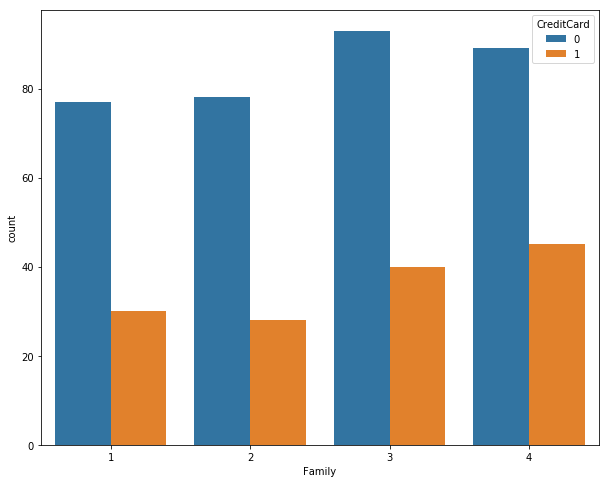

In [8]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Family', data = bank_data, hue = 'CreditCard')

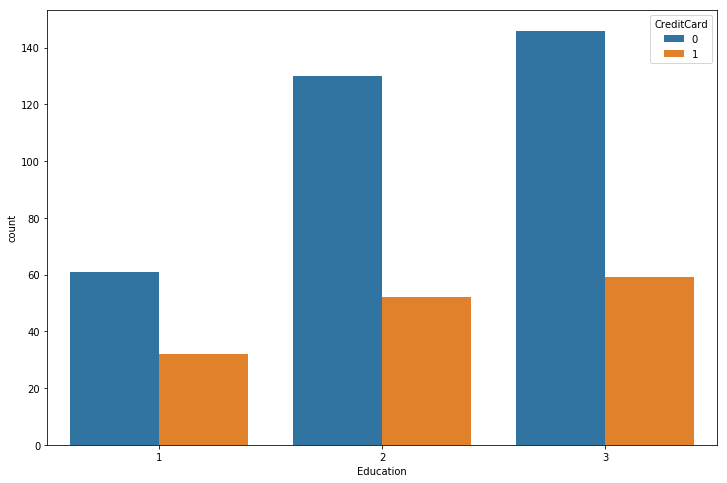

In [9]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Education', data = bank_data, hue='CreditCard')

In [10]:
pd.crosstab(bank_data['Securities Account'], bank_data['CreditCard'])

CreditCard,0,1
Securities Account,,
0,294,126
1,43,17


In [11]:
bank_data_corr = bank_data.corr()
bank_data_corr

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.021260,-0.001712,-0.009196,0.041622,-0.008705,0.053308,0.028577,0.026542
Income,0.021260,1.000000,-0.020876,0.122170,0.189672,-0.053058,0.069669,0.075136,0.013477
Family,-0.001712,-0.020876,1.000000,-0.239996,0.070556,-0.106005,-0.003085,-0.039178,0.050746
Education,-0.009196,0.122170,-0.239996,1.000000,-0.026044,-0.041852,-0.071054,0.000567,-0.038536
Mortgage,0.041622,0.189672,0.070556,-0.026044,1.000000,-0.016809,0.084738,0.063899,0.039181
Securities Account,-0.008705,-0.053058,-0.106005,-0.041852,-0.016809,1.000000,0.464282,0.059631,-0.012052
CD Account,0.053308,0.069669,-0.003085,-0.071054,0.084738,0.464282,1.000000,0.385804,0.514046
Online,0.028577,0.075136,-0.039178,0.000567,0.063899,0.059631,0.385804,1.000000,-0.043762
CreditCard,0.026542,0.013477,0.050746,-0.038536,0.039181,-0.012052,0.514046,-0.043762,1.000000


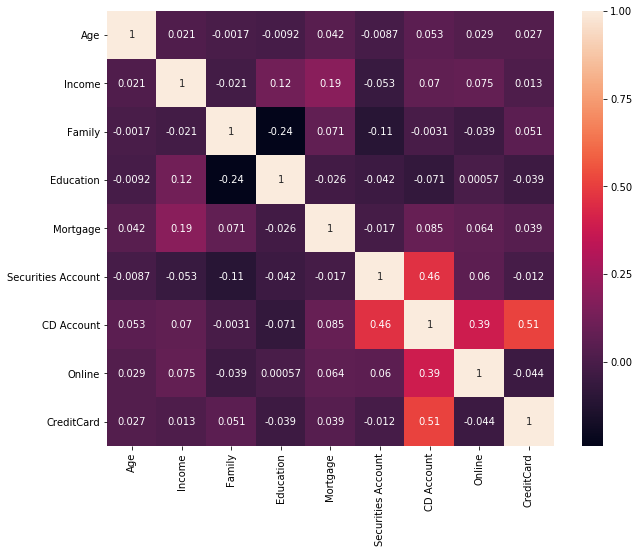

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(bank_data_corr, annot=True)

In [13]:
X = bank_data.drop('CreditCard', axis=1)
Y = bank_data['CreditCard']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

log_clf = LogisticRegression(C=1, solver='liblinear')
svc_clf = SVC(C=1, kernel='linear', gamma='auto')
naive_clf = GaussianNB()

for clf in (log_clf, svc_clf, naive_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8125
SVC 0.8125
GaussianNB 0.8020833333333334


Hard voting classifier (voting='hard') aggregate the predictions of each classifier and predict the class that gets the most votes

In [17]:
voting_clf_hard = VotingClassifier(estimators=[('lr', log_clf), 
                                               ('svc', svc_clf), 
                                               ('naive', naive_clf)],
                                   voting='hard')

In [19]:
voting_clf_hard.fit(x_train, y_train)
y_pred = voting_clf_hard.predict(x_test)
accuracy_score(y_test, y_pred)

0.8125

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        64
           1       0.82      0.56      0.67        32

    accuracy                           0.81        96
   macro avg       0.81      0.75      0.77        96
weighted avg       0.81      0.81      0.80        96



In [21]:
print(confusion_matrix(y_test, y_pred))

[[60  4]
 [14 18]]


In [22]:
for clf_hard in (log_clf, svc_clf, naive_clf, voting_clf_hard):    
    clf_hard.fit(x_train, y_train)
    y_pred = clf_hard.predict(x_test)
    
    print(clf_hard.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8125
SVC 0.8125
GaussianNB 0.8020833333333334
VotingClassifier 0.8125


Soft voting classifier (voting='soft') predict the class with the highest class probability, averaged over all the individual classifiers. 

All of the above classifiers are by default enabled for probability estimates except SVC.    
So in SVC we have to pass one more parameter as probability=True

In [23]:
svc_clf_soft = SVC(C=1, kernel='linear', gamma='auto', probability=True)

voting_clf_soft = VotingClassifier(estimators=[('lr', log_clf), 
                                               ('svc', svc_clf_soft), 
                                               ('naive', naive_clf)],
                                   voting='soft', 
                                   weights = [0.40, 0.30, 0.30])

for clf_soft in (log_clf, svc_clf_soft, naive_clf, voting_clf_soft):
    
    clf_soft.fit(x_train, y_train)
    y_pred = clf_soft.predict(x_test)
    
    print(clf_soft.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8125
SVC 0.8125
GaussianNB 0.8020833333333334
VotingClassifier 0.8125
